#### chap14 모델 성능 향상시키기
##### 와인 자료 활용 -> 레드와인, 화이트와인 예측

In [45]:
# 모델 : Sequential, 레이어 : Dense, 학습과 테스트 : 8:2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv('./data/wine.csv', header=None)
df.head() #마지막 속성이 클래스

X = df.iloc[:, 0:-1]
y = df.iloc[:,-1]

In [47]:
#데이터를 학습데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

#모델 생성
model = Sequential()
model.add(Dense(30, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 30)                390       
                                                                 
 dense_45 (Dense)            (None, 12)                372       
                                                                 
 dense_46 (Dense)            (None, 8)                 104       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [48]:
#모델 컴파일 : loss, optimizer, metrics
model. compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 실행
history = model.fit(X_train, y_train, epochs=50, validation_split=0.25)#학습데이터를 나눠주는

Epoch 1/50
122/122 [==============================] - 1s 3ms/step - loss: 0.3934 - accuracy: 0.8961 - val_loss: 0.2050 - val_accuracy: 0.9331
Epoch 2/50
122/122 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9284 - val_loss: 0.2113 - val_accuracy: 0.9354
Epoch 3/50
122/122 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9302 - val_loss: 0.1739 - val_accuracy: 0.9431
Epoch 4/50
122/122 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9323 - val_loss: 0.1702 - val_accuracy: 0.9423
Epoch 5/50
122/122 [==============================] - 0s 2ms/step - loss: 0.1793 - accuracy: 0.9348 - val_loss: 0.1623 - val_accuracy: 0.9438
Epoch 6/50
122/122 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.9374 - val_loss: 0.1677 - val_accuracy: 0.9431
Epoch 7/50
122/122 [==============================] - 0s 2ms/step - loss: 0.1663 - accuracy: 0.9382 - val_loss: 0.1459 - val_accuracy: 0.9469
Epoch 

In [49]:
history.history['val_accuracy']

[0.9330769181251526,
 0.9353846311569214,
 0.9430769085884094,
 0.942307710647583,
 0.9438461661338806,
 0.9430769085884094,
 0.9469230771064758,
 0.9469230771064758,
 0.944615364074707,
 0.9507692456245422,
 0.9530768990516663,
 0.9623076915740967,
 0.9599999785423279,
 0.9653846025466919,
 0.9661538600921631,
 0.9715384840965271,
 0.9669230580329895,
 0.9692307710647583,
 0.9761538505554199,
 0.9738461375236511,
 0.9830769300460815,
 0.9800000190734863,
 0.9661538600921631,
 0.9738461375236511,
 0.9792307615280151,
 0.9792307615280151,
 0.9769230484962463,
 0.9823076725006104,
 0.9823076725006104,
 0.9823076725006104,
 0.9823076725006104,
 0.9853846430778503,
 0.9853846430778503,
 0.9853846430778503,
 0.9815384745597839,
 0.9861538410186768,
 0.9853846430778503,
 0.9853846430778503,
 0.983846127986908,
 0.9846153855323792,
 0.983846127986908,
 0.9700000286102295,
 0.9876922965049744,
 0.9861538410186768,
 0.983846127986908,
 0.9846153855323792,
 0.9846153855323792,
 0.981538474559783

In [50]:
#모델 업데이트 하면서 모델 학습 실행
from tensorflow.keras.callbacks import ModelCheckpoint

filename = './data/model/{epoch:02d}-{val_accuracy:.4f}.hdf5'

#학습중에 모델 저장
checkpointer = ModelCheckpoint(filepath = filename, verbose = True) 

#모델 생성
model = Sequential()
model.add(Dense(30, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

#모델 컴파일 : loss, optimizer, metrics
model. compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 실행
hist = model.fit(X_train,y_train,epochs=50, validation_split=0.25, verbose=0,
                 batch_size = 500, callbacks = [checkpointer])

score = model.evaluate(X_test, y_test)
print('Test accurarcy:', score[1])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 30)                390       
                                                                 
 dense_49 (Dense)            (None, 12)                372       
                                                                 
 dense_50 (Dense)            (None, 8)                 104       
                                                                 
 dense_51 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________



Epoch 1: saving model to ./data/model\01-0.7615.hdf5

Epoch 2: saving model to ./data/model\02-0.7777.hdf5

Epoch 3: saving model to ./data/model\03-0.7946.hdf5

Epoch 4: saving model to ./data/model\04-0.8238.hdf5

Epoch 5: saving model to ./data/model\05-0.8531.hdf5

Epoch 6: saving model to ./data/model\06-0.8846.hdf5

Epoch 7: saving model to ./data/model\07-0.8923.hdf5

Epoch 8: saving model to ./data/model\08-0.9062.hdf5

Epoch 9: saving model to ./data/model\09-0.9138.hdf5

Epoch 10: saving model to ./data/model\10-0.9138.hdf5

Epoch 11: saving model to ./data/model\11-0.9185.hdf5

Epoch 12: saving model to ./data/model\12-0.9169.hdf5

Epoch 13: saving model to ./data/model\13-0.9262.hdf5

Epoch 14: saving model to ./data/model\14-0.9277.hdf5

Epoch 15: saving model to ./data/model\15-0.9338.hdf5

Epoch 16: saving model to ./data/model\16-0.9331.hdf5

Epoch 17: saving model to ./data/model\17-0.9392.hdf5

Epoch 18: saving model to ./data/model\18-0.9362.hdf5

Epoch 19: saving m

In [51]:
# 모델 학습을 2000호히 실행

#모델 생성
model = Sequential()
model.add(Dense(30, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

#모델 컴파일 : loss, optimizer, metrics
model. compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 실행
hist = model.fit(X_train,y_train,epochs=2000, validation_split=0.25, verbose=0,
                 batch_size = 500)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 30)                390       
                                                                 
 dense_53 (Dense)            (None, 12)                372       
                                                                 
 dense_54 (Dense)            (None, 8)                 104       
                                                                 
 dense_55 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


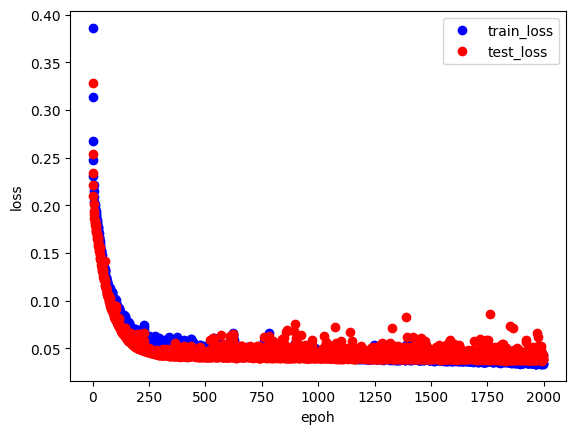

In [52]:
import matplotlib.pyplot as plt

hist_df = pd.DataFrame(hist.history)
hist_df.head()

y_loss = hist_df['loss']
y_vloss = hist_df['val_loss']

X_len = np.arange(len(y_loss))

plt.plot(X_len,y_loss, 'o', c = 'blue', label = 'train_loss')
plt.plot(X_len,y_vloss, 'o', c = 'red', label = 'test_loss')
plt.legend(loc='best')

plt.xlabel('epoh')
plt.ylabel('loss')
plt.show()


#### 학습의 자동중단

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience= 20)

#모델 저장
model_name = './data/model/wine_bestmodel.hdf5'
checkpointer = ModelCheckpoint(filepath=model_name, monitor='val_loss', verbose=0,
                               save_best_only = True)

hist = model.fit(X_train, y_train, epochs=2000, batch_size=500,
                 validation_split = 0.25, callbacks = [early_stopping, checkpointer])

Epoch 1/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0473 - val_accuracy: 0.9892
Epoch 2/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0460 - accuracy: 0.9867 - val_loss: 0.0754 - val_accuracy: 0.9808
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0551 - val_accuracy: 0.9862
Epoch 4/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0401 - val_accuracy: 0.9900
Epoch 5/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0378 - accuracy: 0.9902 - val_loss: 0.0375 - val_accuracy: 0.9908
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0380 - accuracy: 0.9895 - val_loss: 0.0425 - val_accuracy: 0.9892
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 0.0381 - accuracy: 0.9905 - val_loss: 0.0552 - val_accuracy: 0.9869
Epoch 8/2000
8/8 [=